# Analysis of Physical Oceanographic Data - SIO 221A
### Python version of [Sarah Gille's](http://pordlabs.ucsd.edu/sgille/sioc221a/index.html) notes by:
#### Bia Villas Bôas (avillasboas@ucsd.edu) & Gui Castelão (castelao@ucsd.edu)

## Lecture 1

### Introduction to the class
python notebook version of this material: https://github.com/biavillasboas/SIO221A
Welcome to SIOC 221A. This is the first in a 3-quarter sequence about data analysis in phys- ical oceanography. The course is appropriate for first-year grad students, and it serves as an intro- duction to the basics of data analysis. Because we can’t cover all of data analysis in one quarter, we’ll focus this quarter on time series analysis (more on that later). This course is also your in- troduction to the scientific computing resources that are available to you at SIO, and we’ll spend
some time getting everyone up to speed on computing resources. First some basics.

**What happens in each of the three quarters of this course sequence?**

**SIOC 221A.** Time series analysis. We’ll build data analysis skills with an aim to understanding
Fourier transforms, spectral analysis, and how to interpret data using these tools.

**SIOC 221B**. Everything else. Random variables, matrix inversion, the details of least-squares
fitting, objective mapping, empirical orthogonal functions.

**SIOC 221C**. Laboratory class. Project-based examples to put the techniques of data analysis into
practice.

**What are the expectations for this course? See the syllabus.**
1. Weekly problem sets, which you may do collaboratively.
2. Midterm and final problem sets, which you MAY NOT do collaboratively. The final problem
set will be a bit broader than the others and will involve working through a data set that you
choose (or one suggested by your advisor) to test out the techniques that we explore in this
class. It will be somewhat open ended, and you’ll do a brief in-class presentation during our
final exam time slot.
3. Learning something new. Everyone starts this class with a different set of prior experiences.
Some of you are experienced programmers; others are new to Matlab. Take advantage of
this class to master a new skill (e.g. learn Matlab, learn python, learn version control throug
git hub, learn shell scripting). Respect everyone’s differing background.
4. Come to class and participate in discussion. Ask questions. Learn collaboratively.
5. Do assigned reading. Review course notes.

**What will we learn in this class?**

By the end of the course, you should come away with more confidence in your programming
and a solid understanding of time series analysis, the Fourier transform, and spectral methods.

Data analysis is at the heart of evidence-based decision making. This is what defines the
science that we do—all science in fact. Data analysis provides you with the tools to think about
uncertainty, to allow you to be skeptical and to set limits on your skepticism.

**What should I read?** 

See the syllabus for some examples of excellent books that will help broaden
your understanding. The books are available on reserve from the Eckart Building. Course notes are
fairly practical, but you want to come away from this course with enough knowledge to understand
the notation when you need to consult a statistics book for a slightly more complicated topic. Three
of the titles are also available in electronic form. We’ll rely quite a bit on Bendat and Piersol, and
you can start by reading Ch. 1, with a focus on sections 1.1 and 1.3.

### **Why study data analysis?**

In August 2016, the following message was posted to all-at-sio:

*Last Saturday morning, the surface water temperature off La Jolla Shores was 77$^\circ$F.
This morning, it’s 63$^\circ$F. These are dive computer temperatures, so I went to check the CORDC gauges online,
but it looks like those temperatures gauges are offline? Same with SCCOOS... but
maybe those are pulling data from the same gauges? Are there any SIO sea surface
temperature gauges currently online-to show us the last week or two?
My dive buddy’s theory was that this morning we were diving in the middle of a big
incoming tide (note the full moon) and that was causing a lot of mixing of deeper water
and explained the huge drop in sea surface temperature. I was skeptical.
So who’s right? Do big tidal flows cause lower sea surface temperatures?
And what in the world caused this 14$^\circ$F drop in six days???**

You might be wondering about a couple of acroyms. CORDC is the Coastal Observing Research
and Development Center (based at SIO) and SCCOOS is the Southern California Coastal Observing System. And you might also feel like we should use the metric system for temperature. Here
77$^\circ$F = 25$^\circ$C, and 63$^\circ$F = 17.2$^\circ$C, so the temperature drop 7.8$^\circ$C. The post raises a number of issues for us as analyzers of physical oceanograpic data. Here are some possible questions?

1. What’s going on with the data sources? What should they provide, and why did the posters find that the observations were not available?
2. What data do we trust? How reliable is a dive computer and how does dive computer accuracy compare with pier sensor accuracy?
3. What is the typical temperature at the Scripps pier? And what is a typical range of variability? Is this event unusual?
4. What are the mechanisms behind this change? How much confidence do we have in our assessment of the mechanisms?

So having posed a set of questions, what do we do now? Figuring out what to do next is the goal
for this class, and in general for your courses in physical oceanographic data analysis.

### What is a time series?
Let’s start by looking at some time series examples. The slides show a range of different time
series, including winds in the region of Hurricane Jose, which bounced against the New England ´
coastline in September 2017, Arctic ice cover, atmospheric concentrations of CO2 from Mauna
Loa, and temperature and pressure at the Scripps pier.

Simply put, a time series is a one-dimension data set that we can represent as a vector. For
example, we can look at data collected at a single point and ask how they vary over time. Sometimes time series are not collected at a single point. We might examine the time series collected
by an eXpendable BathyThermograph (XBT) as it free falls into the ocean. Officially an XBT
makes measurements as a function of depth, but the engineering variables typically sample at a
fixed sampling rate (e.g. 5 Hz), which means it can be useful to think of the data as a time series.

And sometimes we use the methods of time-series analysis to look at spatial records. Instead of asking about temporal variability (or variability in frequency space) we ask about spatial
variability (or variability in wavenumber.)

###  Data vs models
What governs sea surface temperature at the Scripps pier? In an ideal and noise free world,
we could hypothesize that upper ocean temperatures are controlled by seasonal changes in air-sea
heat fluxes, $Q_{net}$. Thus

$$\frac{dT}{dt} = Q_{net}\hspace{3cm} (1)$$

If $Q_{net}$ were sinusoidal (e.g. $Q_{net} = −q \cos(\omega t)$, where $\omega = 2\pi/365.25$, and $t$ is in days), then we could solve for temperature:

$$T = T_o - \frac{q}{\omega}\sin(\omega t)\hspace{3cm} (2)$$

and we’d have a simple sinusoidal temperature. Real data are never so simple, and we inevitably
have a signal that combines multiple factors:
1. Physical forcing we understand (e.g. the annual cycle in this case.)
2. Physical forcing that we might have hoped to ignore (e.g. the diurnal cycle, or tidal processes.)
3. Instrumental noise (e.g. instrumental inaccuracies.)

### What can we learn from our time series?

So as an example, how can we characterize the Scripps pier sea surface
temperature record?  The pier system reports measurements every 5 minutes
and 40 seconds.
We can label each individual measurement as $T_i$ to denote the $i$th
realization of our temperature measurement.  Each $T_i$ can be referred
to as a *random variable*, and for the moment we'll assume that each
observation is independent.

If we go measure temperature at the pier, what do we expect to see?
The mean or average of the temperature measurements is:

$$\mbox{mean}(T)= \overline{T} = \langle T\rangle = \frac{1}{N} \sum_{i=1}^N T_i \hspace{3cm} (3)$$

This is the mean of my $N$ measurements. The distinction between overlines and angular brackets is a bit arbitrary, and it is up to you, the data analyzer, to explain how you are using the notation. For example, you might see angular brackets used for spatial averages and overbars for temporal averages (or vice versa). (Angular brackets are also sometimes used for an "inner product", which might imply no division by N , so your definitions are important.)
Bendat and Piersol discuss the distinctions between the mean of an ensemble of realizations representing the same point in time, and the time average of a data value collected over time. Formally we like to think of the mean (the first moment) as the value that we would obtain if we sampled at time $t_1$ repeatedly:

$$\mu_T(t_1)=\lim_{N\to \infty} \frac{1}{N}\sum_{k=1}^{N} T_k(t_1),\hspace{3cm} (4)$$

but in reality we don't have an infinite number of samples at $t_1$, so we
often rely on the *ergodic* assumption that the statistics are stationary
so that variability in time and/or space is not significant (or that
variability in time can be interchanged with variability in space, if we
sampled one but not the other.  Thus

$$\mu_T(k) = \lim_{\tau\to \infty} \frac{1}{\tau} \int_0^\tau T_k(t)\, dt. \hspace{3cm} (5)$$

Statisticians specify Greek letters for "parameters" determined from
an entire population, and Roman letters for "statistics" determined
from a finite-sized data sample.
Compare the notation for the population mean $\overline{T}$ in (3) and the
parameter $\mu$ in (4) and (5).

We can leave a detailed discussion
of these distinctions for the future.
But we'll want to remember that the expectation value (denoted with $E$)
of the mean is
defined to represent the value that we would expect if we could
repeat our measurements many times:

$$E(T)= \lim_{N\rightarrow\infty} \frac{1}{N} \sum_{i=1}^N T_i.  \hspace{3cm} (6)$$

(Formally, the expectation value is weighted by the probability of occurrence, but the terminology is probably used most office for derived quantities, when a
Greek letter would complicate the notation.)

Knowing the mean temperature is great, but assuming that the temperature
we measured today doesn't match the mean, how can we tell if the deviation
from the mean is typical?     As a first measure, we can compute the
variance:

$$\mbox{var}(T)= E[(T-E(T))^2].  \hspace{3cm} (7)$$

When we deal with finite numbers of observations we need to be a bit careful:
$$\mbox{var}(T)= \sigma^2_{T} = \frac{1}{N-1} \sum_{i=1}^N (T_i-\overline{T})^2,  \hspace{3cm} (8)$$

and the standard deviation, which is the square-root of the variance:
$$\mbox{std}(T)= \sigma_{T} =  \sqrt{\frac{1}{N-1} \sum_{i=1}^N (T_i-E(T))^2}.  \hspace{3cm} (9)$$

(But a statistician might use $\sigma^2$ for the population variance and $s^2$ for the sample variance, with $\sigma^2$ scaled by $N$ and $s^2$ by $N −1.$) Why do we divide by $N −1$ instead of $N$? Here are a couple of ways to think about this:

1. In the limiting case in which we have only 1 sample, so $N=1$, we can
estimate the mean (badly) as our one measured value ($T_1$), but we don't
know anything about the variability, so we need our standard deviation to
be undefined.  In essence, all our information has been allocated to estimate
the mean, and we don't have enough degrees of freedom to estimate the
standard deviation as well.  Since one degree of freedom was needed for the
mean, only $N-1=0$ degrees of freedom are left for the standard deviation.

2. More formally,  you can think about the problem this way:
$$\begin{eqnarray}
\mbox{var}(T) &= & \frac{1}{M} \sum_{i=1}^N \left(T_i-\frac{1}{N}\sum_{j=1}^N T_j\right)^2 \hspace{6.7cm} (10)\\
 & = & \frac{1}{M} \sum_{i=1}^N \left(T_i^2 -\frac{2T_i}{N}\sum_{j=1}^N T_j +
\frac{1}{N^2} \sum_{j=1}^N \sum_{k=1}^N T_j T_k\right) \hspace{3cm} (11)\\
 & = &  \frac{1}{M} \sum_{i=1}^N \left(T_i^2 -\frac{T_i}{N}\sum_{j=1}^N T_j \right), \hspace{6.6cm} (12)
\end{eqnarray}$$

where we want to determine $M$. Rearranging,
$$\begin{equation}
\mbox{var}(T)= \frac{1}{MN} \sum_{i=1}^N\sum_{j=1}^N \left(T_i(T_i- T_j)\right). \hspace{3cm} (13)
\end{equation}$$
For the summation over $j$, we'll end up using $N$ values of $T_j$, but
then when we start summing over $i$, every time $i=j$, $T_i-T_j = 0$,
so we'll have only $N-1$ non-zero terms in the sum.  Thus we set $M=N-1$
to avoid biasing our variance.

The mean and standard deviation give us quite a bit of information, but
they don't tell us everything.  What if temperature at the pier were generated
by a coin toss, with only two values (e.g. 25$^\circ$C or 17.2$^\circ$C)?  That
would give us a bimodal distribution?  With a hundred realizations,
we could make a histogram of temperatures like Figure 1:
<img src="files/lecture1/histogram.png">
<center>Figure 1: Bimodal histogram for hypothetical sea surface temperature distribution.<center>


Histograms are useful, but they're hard to compare for different numbers
of data points.  To allow comparison, we normalize as a probability
density function so that the area under the curve tells us the probability
of finding an observed value within a given range.  Formally,
for a probability density function $p(x)$,

$$\begin{equation}
\int_a^b p(x) \, dx = \mbox{\rm Prob}[a < x \le b],  \hspace{3cm} (14)
\end{equation}$$

and the total area under the curve for $p(x)$ is fixed

$$\begin{equation}
\int_{-\infty}^\infty p(x) \, dx = \mbox{\rm Prob}[-\infty < x \le \infty] = 1.  \hspace{3cm} (15)
\end{equation}$$

If we use 1$^\circ$C bins, then the pdf for our hypothetical bimodal data
would be illustrated by Figure 2.

<img src="files/lecture1/pdf.png">
 <center>Figure 2: Probability density function for bimodal hypothetical sea surface temperature data shown in Figure 1.<center>

On the other hand, we might find that pier temperatures are distributed uniformly around the mean. (In Python, the function `rand` from the `numpy.random` module will generate a uniform distribution, which looks like a top hat.)  A uniform distribution could have exactly the same mean and standard deviation as our bimodal distribution, so we wouldn't be able to tell them apart just by computing the mean and standard deviation.

More classically, we hypothesize that data have a Gaussian distribution,
the classic bell-shaped curve, which can be represented as:
$$\begin{equation}
p(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
\end{equation}$$
where $\mu$ is the mean and $\sigma$ is the standard deviation.
Again, we can define the Gaussian distribution to have the same mean
and standard deviation as the bimodal distribution.  Clearly we'll need
some stronger tools to interpret our data.

So far we've talked about symmetric distributions, but data can have highly lopsided distributions.  Think about rainfall in San Diego. There's no rain for months and months, and then suddenly we have12 hours of continuous rain that deliver several mm of precipitation. A summer rainfall pdf would look like Figure 3. In this case, the mean is non-zero, but the typical day has no rain.

<img src="files/lecture1/rainfall.png">
 <center>Figure 3: Probability density function for hypothetical southern California
summertime rainfall.  Most days have zero rainfall, and a small number of
non-zero rainfall days occur.<center>


So how typical is 2018 sea surface temperature data in La Jolla
Shores?  We can plot these data with the following procedure, and you can judge for yourself. As discussed on the [netcdf4_basics](https://github.com/biavillas/SIO221A/blob/master/python_basics/netcdf4_basics.ipynb) notes you can either download the 2018 Scripps Pier data to your computer from the [SCCOOS](http://sccoos.org/thredds/catalog/autoss/catalog.html}{http://sccoos.org/thredds/catalog/autoss/catalog.html) data server or read the data directly from the THREDDS server. Here, we're gonna do the later. 

Before running the cells below, you might need to run the following on a terminal: 

`conda install -c conda-forge nc-time-axis` 

In [1]:
# We need the line below so the figures appear on the notebook 
%matplotlib inline 
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
sccoos_thredds = 'http://sccoos.org/thredds/dodsC/autoss/scripps_pier-2020.nc'

In [3]:
# let's open the date and check what is stored in the xarray dataset
ds = xr.open_dataset(sccoos_thredds)
print(ds)

<xarray.Dataset>
Dimensions:                     (time: 130442)
Coordinates:
  * time                        (time) object 2020-01-01 00:00:32 ... 2020-12...
    lat                         float32 ...
    lon                         float32 ...
    depth                       float32 ...
Data variables: (12/27)
    temperature                 (time) float32 ...
    conductivity                (time) float32 ...
    pressure                    (time) float32 ...
    salinity                    (time) float32 ...
    chlorophyll_raw             (time) float32 ...
    chlorophyll                 (time) float32 ...
    ...                          ...
    aux4                        (time) float32 ...
    instrument1                 |S64 ...
    instrument2                 |S64 ...
    platform1                   |S64 ...
    station                     |S64 ...
    crs                         float64 ...
Attributes: (12/68)
    _NCProperties:                   version=1|netcdflibversion=

### Ploting directly from xarray
First, let's plot the data straigh from the xarray data_array, which will make use of the metadata that is in the NetCDF file.

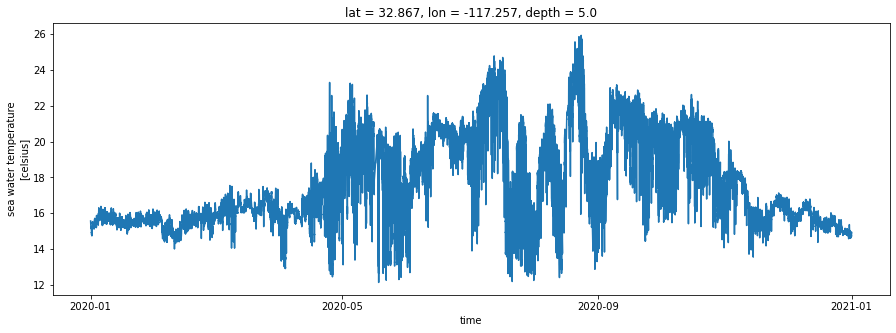

In [4]:
plt.figure(figsize=(15,5))
ds['temperature'].plot()

Here, we didn't have to specify the axis labels and units. xarray did that for us taking that information straight from the netCDF attributes.

### Ploting from matplotlib
Now let's use a more traditional approach with a lot of tweaking.

Text(0.5, 1.0, 'Pier Temperature (2019)')

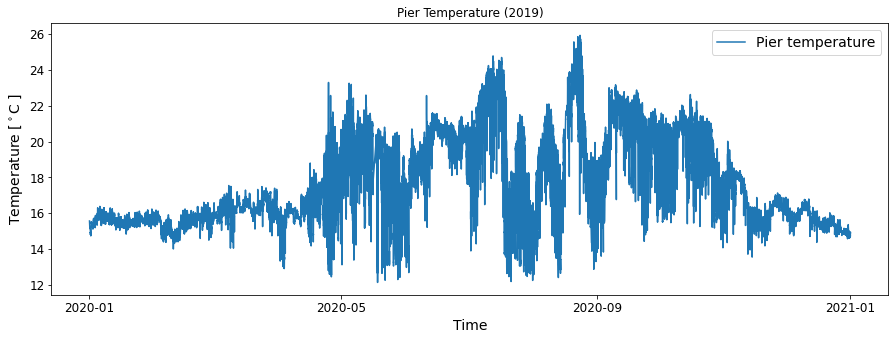

In [5]:
plt.figure(figsize=(15,5))
plt.plot(ds['temperature'].time, ds['temperature'], label='Pier temperature')
plt.ylabel('Temperature [$^\\circ$C ]', fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Time', fontsize=14)
plt.xticks(fontsize=12)
plt.legend(fontsize=14)
plt.title('Pier Temperature (2019)')

### Interactive Ploting 
Finally, let's use the [hvplot](https://hvplot.pyviz.org) to make an interactive plot.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
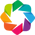

In [6]:
# needed conda install -c conda-forge nc-time-axis
# conda install datashader
import hvplot.xarray
import holoviews as hv

hv.extension('bokeh')

In [7]:
ds

<xarray.Dataset>
Dimensions:                     (time: 130442)
Coordinates:
  * time                        (time) object 2020-01-01 00:00:32 ... 2020-12...
    lat                         float32 ...
    lon                         float32 ...
    depth                       float32 ...
Data variables: (12/27)
    temperature                 (time) float32 15.56 15.55 15.53 ... 14.91 14.9
    conductivity                (time) float32 ...
    pressure                    (time) float32 ...
    salinity                    (time) float32 ...
    chlorophyll_raw             (time) float32 ...
    chlorophyll                 (time) float32 ...
    ...                          ...
    aux4                        (time) float32 ...
    instrument1                 |S64 ...
    instrument2                 |S64 ...
    platform1                   |S64 ...
    station                     |S64 ...
    crs                         float64 ...
Attributes: (12/68)
    _NCProperties:                   version=1|netcdflibversion=4.4.1|hdf5lib...
    comment:                         The Scripps Pier automated shore station...
    platform_vocabulary:             GCMD Earth Science Keywords. Version 8.5
    time_coverage_resolution:        PT1S
    geospatial_vertical_max:         5
    geospatial_bounds_crs:           EPSG:4326
    ...                              ...
    date_issued:                     2021-01-01T00:00:22Z
    time_coverage_start:             2020-01-01T00:00:32Z
    date_metadata_modified:          2021-01-01T00:00:22Z
    DODS.strlen:                     25
    DODS.dimName:                    stationNameLength
    DODS_EXTRA.Unlimited_Dimension:  time

In [8]:
temp = ds.temperature
temp.hvplot(datashade=True, width=800, height=400)

:DynamicMap   []
   :RGB   [time,temperature]   (R,G,B,A)

## Side note on biased and unbiased estimators for Numpy arrays

If you are new to Python, something that you should keep in mind is that most function in Python are very well documented, so *READ THE DOCUMENTATION* before using any function for the first time. This is specially important if you are comming from a different programming language (e.g. MATLAB), or if you plan to colaborate and compare your results with others.

For example, in the way the the standard deviation was defined here (equation 9), we're using the convention for an unbiased estimator and dividing by $N-1$. Now, suppose we have a timeseries of temperature $T$:

In [9]:
import numpy as np
T = np.array([14.3, 14.8, 22, 22.1, 20.4, 18.2])

Let's compute the standar deviation "by hand"

In [10]:
N = len(T)
T_mean = np.mean(T)
T_std = (np.sum((T-T_mean)**2)/(N-1))**.5
print('mean: %.4f,  standard deviation: %.4f' %(T_mean, T_std))

mean: 18.6333,  standard deviation: 3.4679


Now, if we use the standar deviation function from numpy:

In [11]:
print('mean: %.4f,  standard deviation: %.4f' %(T_mean, T.std()))

mean: 18.6333,  standard deviation: 3.1658


We see that the standard deviations don't quite agree. Let's see why:

In [12]:
np.std?

Signature:
np.std(
    a,
    axis=None,
    dtype=None,
    out=None,
    ddof=0,
    keepdims=<no value>,
    *,
    where=<no value>,
)
Docstring:
Compute the standard deviation along the specified axis.

Returns the standard deviation, a measure of the spread of a distribution,
of the array elements. The standard deviation is computed for the
flattened array by default, otherwise over the specified axis.

Parameters
----------
a : array_like
    Calculate the standard deviation of these values.
axis : None or int or tuple of ints, optional
    Axis or axes along which the standard deviation is computed. The
    default is to compute the standard deviation of the flattened array.

    .. versionadded:: 1.7.0

    If this is a tuple of ints, a standard deviation is performed over
    multiple axes, instead of a single axis or all the axes as before.
dtype : dtype, optional
    Type to use in computing the standard deviation. For arrays of
    integer type the default is float64, for 

**The std function from numpy has an argument ``ddof``, such that the divisor used in calculations is ``N - ddof`` and the default `ddof` is zero. So in other for the two methods to agree, we have to do:**

In [13]:
print('standard deviation from eq 9: %.4f' %T_std)
print('standard deviation from numpy: %.4f' %T.std(ddof=1))

standard deviation from eq 9: 3.4679
standard deviation from numpy: 3.4679


#### Everything should be fine, as long as you read the docs.